# SOURCE & SINK IN A FREESTREAM

Let's get started by importing the necessary libraries


In [1]:
import numpy
import math
from matplotlib import pyplot
# display the figures in the notebookto give us plots imbedded within the nb
%matplotlib inline

In [2]:
N = 200
x_start, x_end  = -4.0, 4.0
y_start, y_end = -2.0, 2.0 
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

Meshgrid: the function puts the points in a grid of 200 x 200 points creating a grid instead of having to loop over the different x and y coordinates individually. We can do matrix operations with this form of matrix rather than individual. It saves on time for computing 

In [3]:
numpy.shape(X)

(200, 200)

## Source in a uniform flow 

Last time, we computed the velocity field of a source and a sink. What happens if we superimpose a source on a uniform flow?

Stream lines of freesteam are angle dependent. 

We want to write some code that will with an angle of alpaha = 0 

Useful functions: **zeros()** and **ones()** will give arrays of a defined sizes on 0's or 1's. 


In [4]:
u_inf = 1.0 

# compute the freestream velocity field
u_freesteam = u_inf*numpy.ones((N,N), dtype = float)
v_freesteam = numpy.zeros((N,N),dtype =float)

# computing the stream function 
psi_freesteam  = u_inf*Y


The stream function from the source was went over in the previous notebook. A sink is just the same formula except that is has a negative sign. 

We are going to define a function called **get_velocity()** to compute the velocity components (u,v) on a mesh (X, Y) given the strength of the singularity and its location (xs,ys) 

**REMEMBER TO END THE FIRST LINE WITH A COLON OR YOU WILL GET A ERROR**

The triple quotes are the help() for the function 

In [5]:
def get_velocity(strength, xs,ys,X,Y):
    """returns the velocity field generated by a source and sink
    strength: strength of source/sink (float)
    xs : x-coordinate of the source/sink
    ys : y-coordinate of the source/sink 
    X : 2D mesh of x coordinates 
    Y : 2D mesh of y coordinates
    
    you will get u and v 
    u : 2D x components of the velocity vector field 
    v : 2D y-components of the velocity vector field 
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v
    

In [6]:
help(get_velocity)


Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    returns the velocity field generated by a source and sink
    strength: strength of source/sink (float)
    xs : x-coordinate of the source/sink
    ys : y-coordinate of the source/sink 
    X : 2D mesh of x coordinates 
    Y : 2D mesh of y coordinates
    
    you will get u and v 
    u : 2D x components of the velocity vector field 
    v : 2D y-components of the velocity vector field



u and v will be the outpusts and calculated within the funcitons 

we will define another function for our uses **get_stream_function**


In [8]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function generated by a source/sink 
    
    Parameters: 
    strength(float): strength of the source/sink 
    xs(float): x-coordinate of the source/sink
    ys(float): y-coordinate of the source/sink 
    X(2D Numpy array of floats): x-coordinates of the mesh points 
    Y(2D Numpy array of floats): y-coordinates of the mesh points 
    
    Returns: 
    psi(2D Numpy array of floats): The stream function
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

FUNCTIONS MAKE THINGS EASIER! We don't have to keep writing all that mess

Lets use them!


In [9]:
strength_source = 5.0 
x_source, y_source = -1.0, 0.0

#compute that velocity field!
u_source, v_source = get_velocity(strength_source,x_source,y_source,X,Y)

# compute that stream-function 
psi_source = get_stream_function(strength_source,x_source,y_source,X,Y)

Super Position is a magical thing, let's use it to combine the streamlines of a freestream and a source

The stagnation point is called the dividing streamline. It separates the fluid from the freestream and the fluid from the source flow. 

**STUDY THIS SECTION SOME MORE**


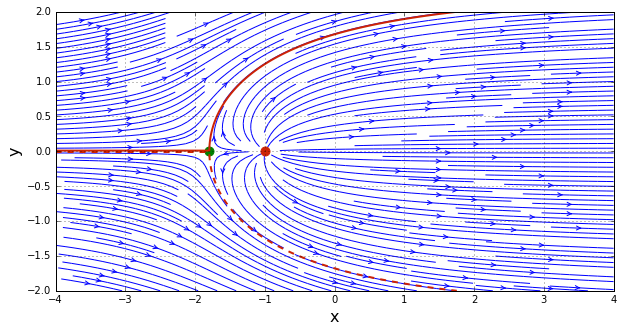

In [11]:
# superposition of the source on the freestream
u = u_freesteam + u_source 
v = v_freesteam + v_source 
psi = psi_freesteam + psi_source 

# plotting 
size = 10 
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=80,marker='o')

#calculate the stagnation point 
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source 

# display stagnation pt 
pyplot.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')

#display the dividing streamline 
pyplot.contour(X,Y,psi,levels=[-strength_source/2,+strength_source/2],
              colors='#CD2305',linewidths=2,linstyles='solid');

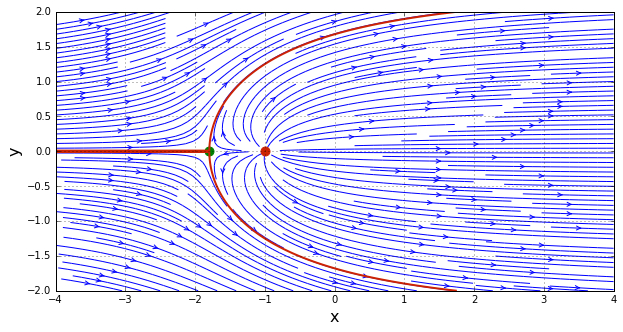

In [15]:
# superposition of the source on the freestream
u = u_freesteam + u_source
v = v_freesteam + v_source
psi = psi_freesteam + psi_source

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');


**SOMEHOW THE DIFFERENCE BETWEEN  THE TWO IS DIFFERENT **